**Research of trips of users of different cities for renting GoFast scooters**
You were given data about some users from several cities, as well as about their trips. Analyze the data and test some hypotheses that can help your business grow. To travel around the city, GoFast users use a mobile application. The service can be used: without a subscription, there is no subscription fee; the cost of one minute of a trip is 8 rubles; the cost of a start (start of a trip) is 50 rubles; with an Ultra subscription the subscription fee is 199 rubles per month; the cost of one minute of a trip is 6 rubles; the cost of a start is for free


**Purpose of the study**:
-test hypotheses:
Product managers of the service want to increase the number of subscribed users. To do this, they will conduct various promotions, but first, you need to find out a few important points.
6.1 Do subscribed users spend more time traveling?
6.2 Can we say that the distance traveled by users with a subscription in one trip does not exceed 3130 meters?
6.3. Test a hypothesis about whether the monthly revenue from users with a monthly subscription will be higher than the revenue from users without a subscription.
6.4. Imagine this situation: the service’s technical team updated the servers with which the mobile application interacts. She hopes that because of this, the number of calls to technical support has decreased significantly. A certain file contains data for each user on the number of hits before and after the update. What test would you need to test this hypothesis?


**Research progress**:
I will get data about users and trips from 3 CSV files.
users_go.csv
rides_go.csv
subscriptions_go.csv
Data quality is unknown, so a review of the data will be needed. I will check the data for errors and evaluate their impact on the study. Then, in the pre-processing phase, I will look for ways to correct data errors that do not distort the final result. Then I’ll create the necessary columns and move on to exploratory analysis.
Thus, my research will go through 7 stages.
1. Loading data
2. Data preprocessing
3. Exploratory data analysis
4. Data merging
5. Revenue calculation
6. Hypothesis testing
7. Distributions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy.stats import binom
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns

# Step 1. Loading data

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#loading data and saving to dataframes
users= pd.read_csv('/content/drive/MyDrive/datasets/users_go.csv')

In [4]:
#output the first five lines
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [5]:
#display general information about the users dataframe
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [6]:
#loading data and saving to dataframes
rides= pd.read_csv('/content/drive/MyDrive/datasets/rides_go.csv')

In [7]:

rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [8]:

rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [9]:

subscriptions= pd.read_csv('/content/drive/MyDrive/datasets/subscriptions_go.csv')



In [10]:

subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [11]:

subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Conclusions from the loaded data frames:**
The data was successfully loaded from three different CSV files into the corresponding data frames: users_go.csv, rides_go.csv, and subscriptions_go.csv.
These files contain information about service users, their trips, and subscriptions.

**Analysis of the First Lines:**

The first rows of each data frame were displayed for visual inspection.
User data includes information such as user ID, city, age, and other characteristics.

Trip data includes user ID, trip duration, distance, and date.
Subscription data contains information about the type of subscription, the cost of the subscription, the cost of starting a trip, and the cost of a minute.

**General Information:**

General information about each data frame was analyzed, including data types, number of rows and columns, presence of missing values, etc. -There are no missing values. The date column, which represents the date of the trip, should be changed from the object data type to datetime. The month from this column should be separated into a separate column so that seasonal variations can be assessed.

For ease of analysis, three data frames should be combined into one. You should also search for duplicates.


# Step 2. Data preprocessing

In [12]:
#casting the date of the riders table to a pandas date type
rides['date'] = pd.to_datetime(rides['date'])

In [13]:
#creating a column with the month number
rides['month_of_ride'] = rides['date'].dt.month

In [14]:
#check data period
years = rides['date'].dt.year.unique()
display(sorted(years))


[2021]

Data is presented for one year only

In [15]:
rides.head()

,user_id,distance,duration,date,month_of_ride
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [16]:
# Finding obvious duplicates in the users table
duplicate_rows = users.duplicated(keep=False)

# Print all complete duplicates


display(users[duplicate_rows])

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
46,47,Юрий,28,Тюмень,ultra
71,72,Никита,25,Москва,ultra
107,108,Влада,29,Тюмень,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


In [17]:
# Remove all duplicates
users.drop_duplicates(inplace=True)
# Output updated table without duplicates and with updated index
display(users)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


In [18]:
# Update numbering (index) in DataFrame
users.reset_index(drop=True, inplace=True)

# Output updated DataFrame with new numbering
display(users)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


In [19]:
# Find obvious duplicates in the riders table
duplicate_rows = rides.duplicated(keep=False)

# Print all complete duplicates
display(rides[duplicate_rows])

,user_id,distance,duration,date,month_of_ride


In [20]:
users.isnull().sum().sum()

0

In [21]:
rides.isnull().sum().sum()

0

##Conclusions on data preprocessing:

**Data Type Conversion:**
The date column was successfully converted to a pandas data type. This simplifies working with dates in subsequent analysis, allowing you to correctly sort records by time, as well as perform time calculations.

**Adding a Month Column:**

Based on the date column, a new column was created to display the month number. This will allow you to analyze data every month, grouping data by month and analyzing trends or seasonal patterns.

**Checking for Missing Values and Duplicates:**

All data frames were checked for missing values. There are no missing values.
Duplicate records in data frames were identified and successfully deleted (62 rows in users), which eliminates possible distortion of analysis results due to duplicate data.

As a result of data preprocessing, the data frames became ready for further analysis. The absence of missing values and duplicates, and the correct presentation of data (for example, dates in the correct format) provide a reliable basis for statistical analysis and conclusions based on this data

# Step 3. Exploratory data analysis

In [22]:
users.columns

Index(['user_id', 'name', 'age', 'city', 'subscription_type'], dtype='object')

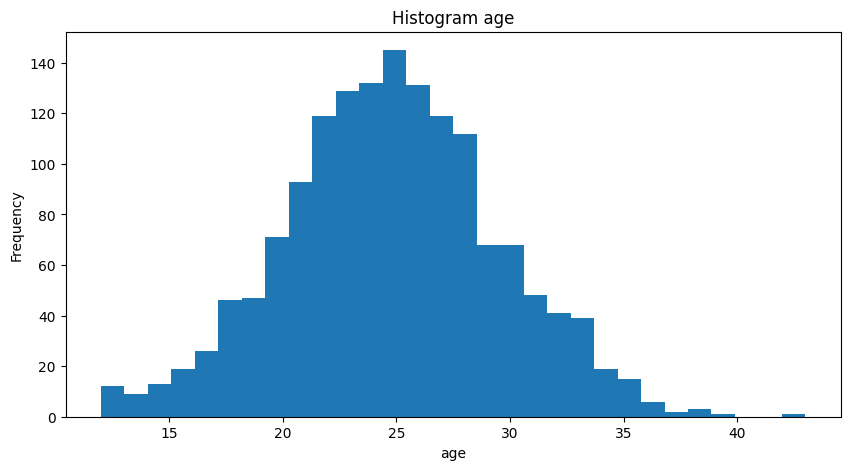

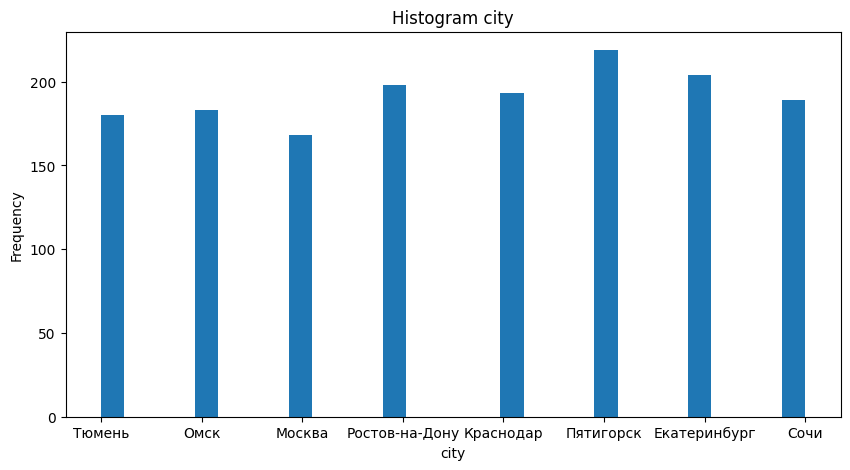

In [23]:
# Constructing histograms for each users column
#specified columns
columns_to_plot =['age', 'city']

for column in columns_to_plot:
     plt.figure(figsize=(10, 5))
     plt.hist(users[column], bins=30)
     plt.xlabel(column)
     plt.ylabel('Frequency')
     plt.title(f'Histogram {column}')
     plt.show()



In [24]:
percentages = users['subscription_type'].value_counts(normalize=True) * 100
display(percentages)

free     54.432855
ultra    45.567145
Name: subscription_type, dtype: float64

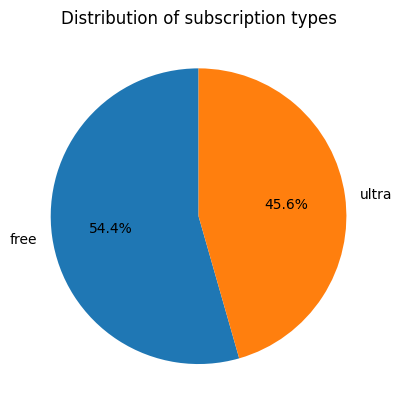

In [25]:
#displaying the ratio of user type on a pie chart
percentages.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Distribution of subscription types")
plt.ylabel("") # Remove the y-axis title for better display
plt.show()

In [26]:
# Counting the frequency of occurrence of cities
city_counts = users['city'].value_counts()

# Output the result
display(city_counts)

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [27]:
# Subscription type frequency counting
subscription_type_counts = users['subscription_type'].value_counts()

# Output the result
display(subscription_type_counts)

free     835
ultra    699
Name: subscription_type, dtype: int64

In [28]:
#description of the age column
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [29]:
#median age
users['age'].median()

25.0

In [30]:
rides.columns


Index(['user_id', 'distance', 'duration', 'date', 'month_of_ride'], dtype='object')

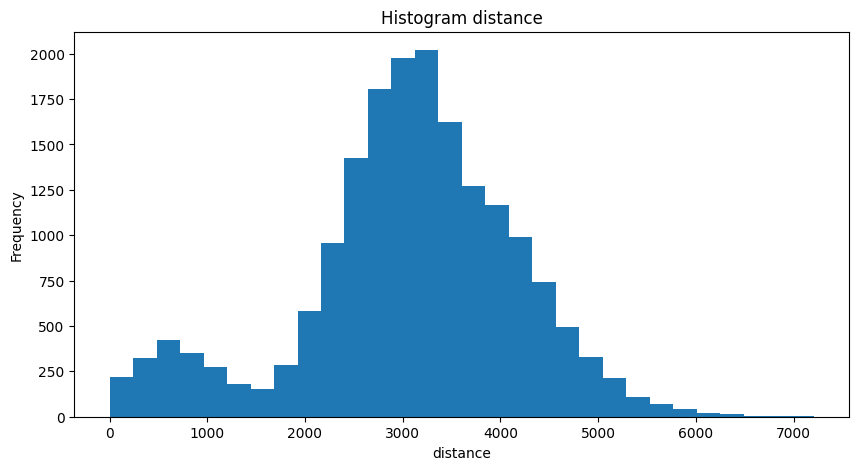

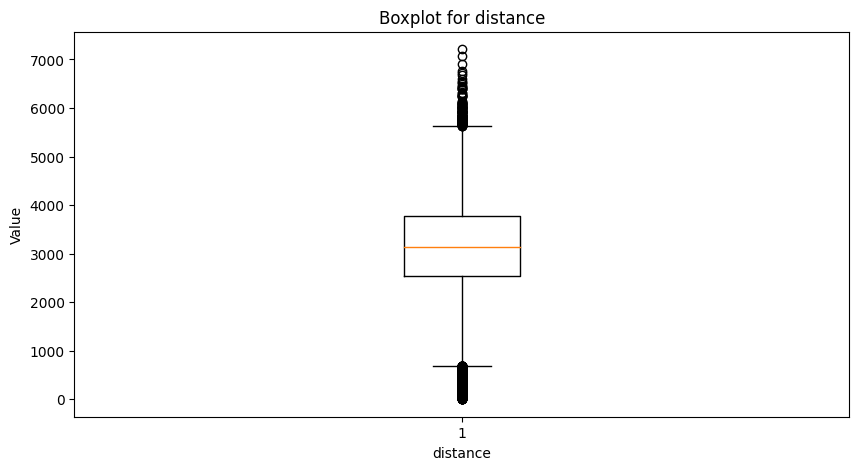

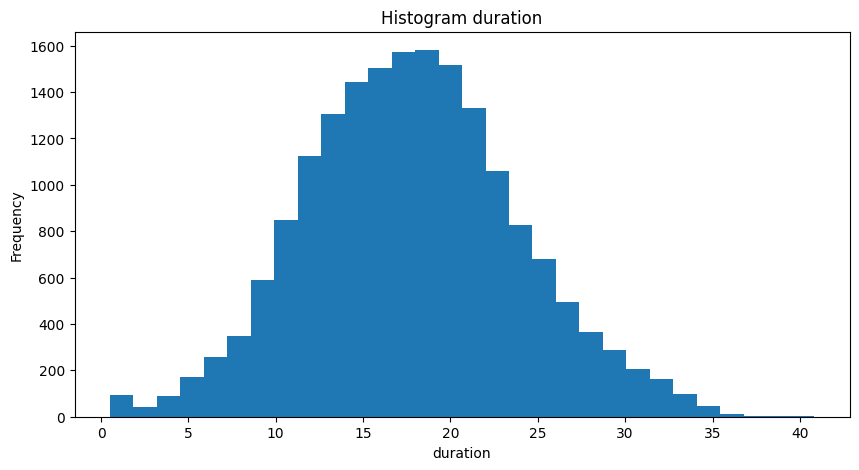

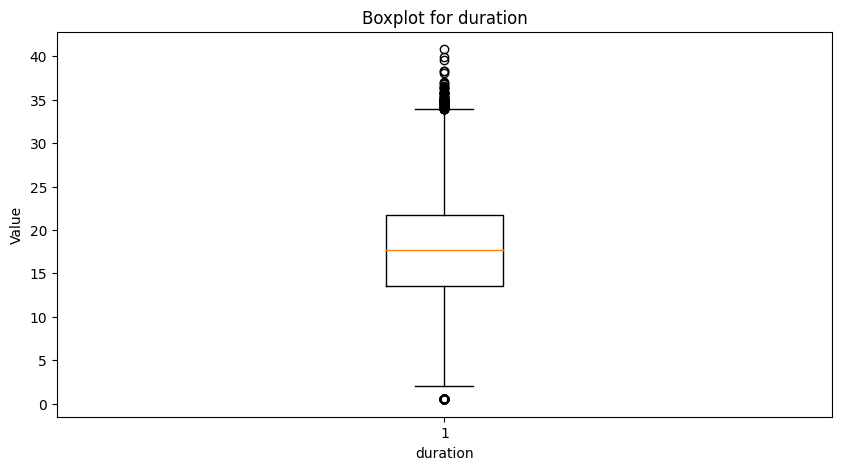

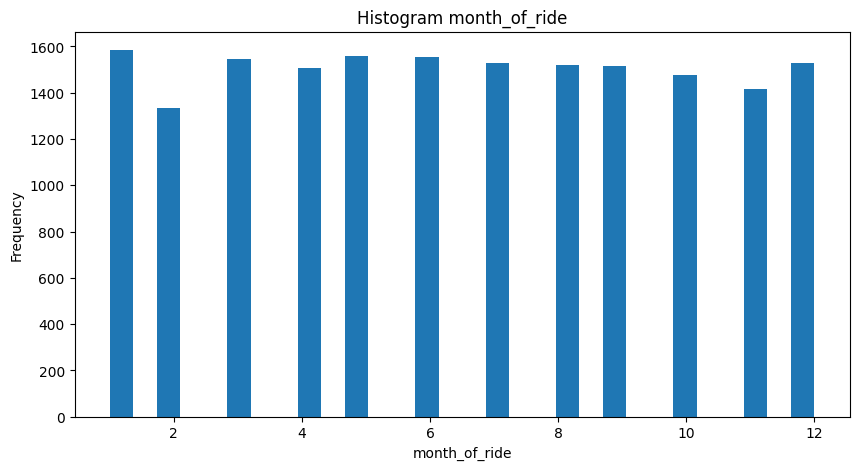

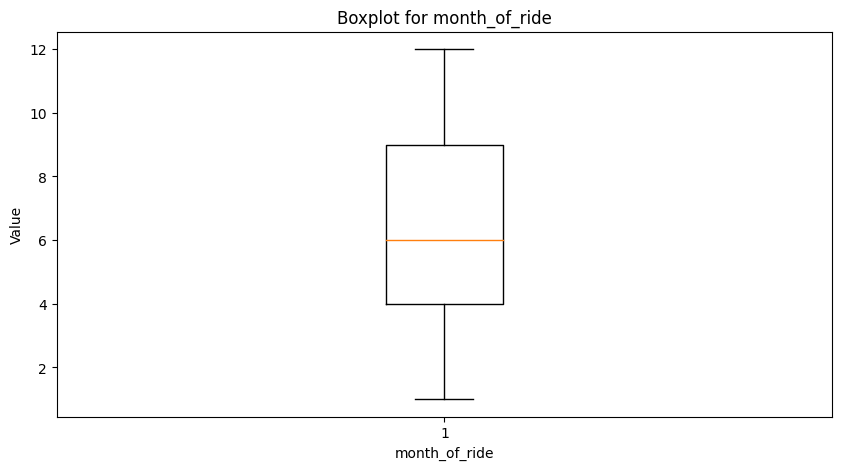

In [31]:
# Constructing histograms for each rides column
#specified columns
columns_to_plot =['distance', 'duration', 'month_of_ride']

for column in columns_to_plot:
     plt.figure(figsize=(10, 5))
     plt.hist(rides[column], bins=30)
     plt.xlabel(column)
     plt.ylabel('Frequency')
     plt.title(f'Histogram {column}')
     plt.show()

      # Boxplot
     plt.figure(figsize=(10, 5))
     plt.boxplot(rides[column])
     plt.xlabel(column)
     plt.ylabel('Value')
     plt.title(f'Boxplot for {column}')
     plt.show()

In [32]:
#distance column description
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [33]:
#median distance traveled by the user in one trip
rides['distance'].median()

3133.6099936787664

In [34]:
#duration of trips
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [35]:
#duration of trips
rides['duration'].median()

17.678394530393803

##Conclusions: exploratory data analysis:
        
**Frequency of occurrence of cities:**
The data contains users from several cities. Some cities are represented more actively, perhaps due to a more active advertising campaign. The leading cities in terms of user activity have been identified, which may indicate the most promising markets for the development or strengthening of marketing efforts. The most users are in Pyatigorsk (219), and the least in Moscow (168)
The ratio of users with subscription and without subscriptions:
It was found that more people (835) did not have a subscription and only 699 with an ultra subscription.

**Users age:**
The data revealed a range of user ages. They range from teenagers 12 years old to middle age with a maximum of 43 years old, with the most common users of scooters being young people 25 years old.

**Distance traveled by the user in one trip:**
Most trips are made over an average distance of just over 3 km (3133.60m), but you can also see a large number of short trips in the histogram. Probably scooters are often used for short trips (for example, from the metro to home)

**Duration of trips:**
Users spend an average of 17.67 minutes traveling on scooters.

# Step 4. Merging data

In [36]:
#display the sizes of datasets before merging
display("Users dataframe size:", users.shape)
display("Rides dataframe size:", rides.shape)
display("Subscriptions dataframe size:",subscriptions.shape)

'Users dataframe size:'

(1534, 5)

'Rides dataframe size:'

(18068, 5)

'Subscriptions dataframe size:'

(2, 4)

In [37]:
users.columns


Index(['user_id', 'name', 'age', 'city', 'subscription_type'], dtype='object')

In [38]:
rides.columns


Index(['user_id', 'distance', 'duration', 'date', 'month_of_ride'], dtype='object')

In [39]:
subscriptions.columns

Index(['subscription_type', 'minute_price', 'start_ride_price',
       'subscription_fee'],
      dtype='object')

In [40]:
 # Merging the users and rides tables using the 'user_id' column
merged_data = pd.merge(users, rides, on='user_id')



In [41]:
# Merging the merged_data and subscription tables using the 'subscription_type' column
merged_data = pd.merge(merged_data, subscriptions, on='subscription_type')


In [42]:

display(merged_data.head())

,user_id,name,age,city,subscription_type,distance,duration,date,month_of_ride,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [43]:

display("Размер датафрейма merged_data:", merged_data.shape)

'Размер датафрейма merged_data:'

(18068, 12)

The dimension of the resulting dataset coincides with the dimension of the original one. Therefore, the merger was completed correctly. There is no data loss or duplicates.

In [44]:
# DataFrame with data about users without a subscription (subscription_type == 'free') using the query() method:
users_without_subscription = merged_data.query("subscription_type == 'free'")





In [45]:
# DataFrame with data about users with subscription type 'ultra' (subscription_type == 'ultra') using the query() method:
users_with_ultra_subscription = merged_data.query("subscription_type == 'ultra'")


In [46]:
users_without_subscription.columns

Index(['user_id', 'name', 'age', 'city', 'subscription_type', 'distance',
       'duration', 'date', 'month_of_ride', 'minute_price', 'start_ride_price',
       'subscription_fee'],
      dtype='object')

In [47]:
users_without_subscription.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month_of_ride      11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [48]:
users_with_ultra_subscription.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month_of_ride      6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


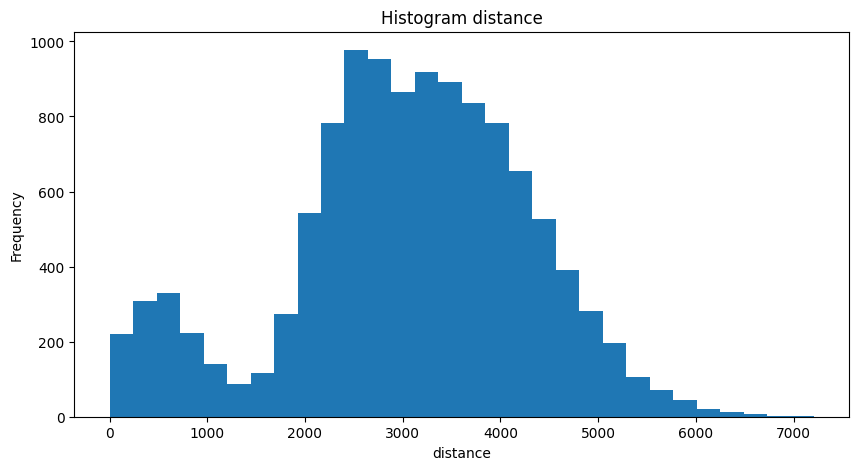

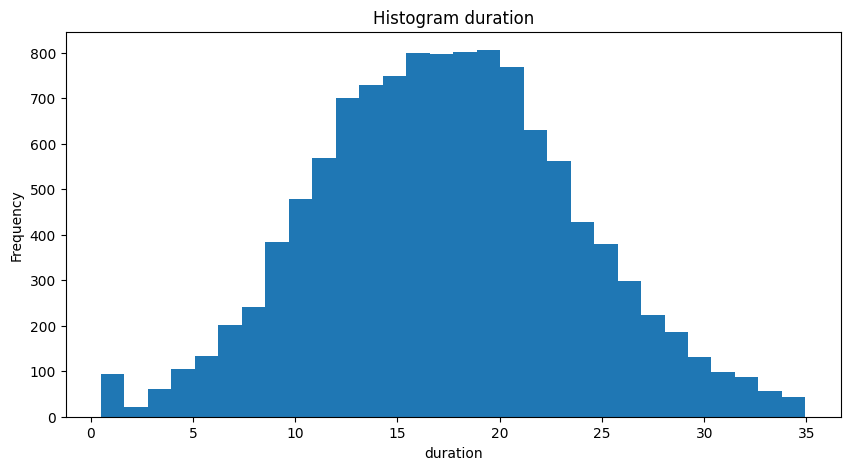

In [49]:
# Constructing histograms for each column users_without_subscription
#specified columns
columns_to_plot =['distance',
        'duration']

for column in columns_to_plot:
     plt.figure(figsize=(10, 5))
     plt.hist(users_without_subscription[column], bins=30)
     plt.xlabel(column)
     plt.ylabel('Frequency')
     plt.title(f'Histogram {column}')
     plt.show()

In [50]:
users_without_subscription.columns

Index(['user_id', 'name', 'age', 'city', 'subscription_type', 'distance',
       'duration', 'date', 'month_of_ride', 'minute_price', 'start_ride_price',
       'subscription_fee'],
      dtype='object')

In [51]:
users_without_subscription['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [52]:
users_without_subscription['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [53]:
users_without_subscription['distance'].median()

3114.648464847295

In [54]:
users_without_subscription['duration'].median()

17.326890226082043

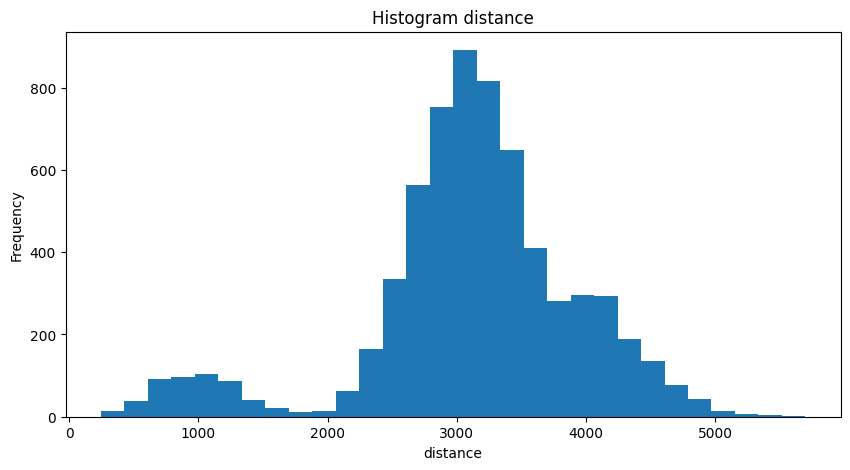

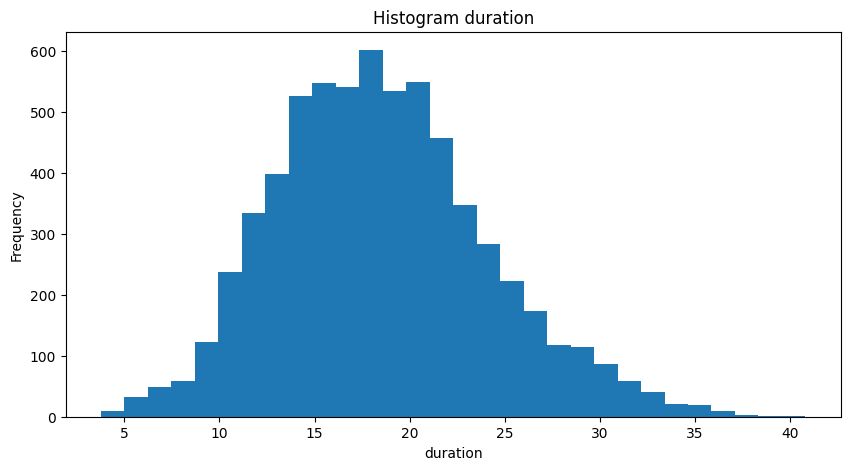

In [55]:
# Constructing histograms for each column users_with_ultra_subscription
#specified columns
columns_to_plot =['distance',
        'duration']

for column in columns_to_plot:
     plt.figure(figsize=(10, 5))
     plt.hist(users_with_ultra_subscription[column], bins=30)
     plt.xlabel(column)
     plt.ylabel('Frequency')
     plt.title(f'Histogram {column}')
     plt.show()

In [56]:
users_with_ultra_subscription['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [57]:
users_with_ultra_subscription['duration'].median()

18.17815320055055

In [58]:
users_with_ultra_subscription['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [59]:
users_with_ultra_subscription['distance'].median()

3148.6372291760854

##Conclusion: Data merging

User, trip, and subscription data was successfully combined into one data frame. This will allow for a more detailed and comprehensive analysis of user activity, taking into account all available aspects of their interaction with the service.

**Separation of data by subscription type:**
To study the behavior of different categories of users in detail, the data was divided into two groups: users without a subscription and users with a subscription. This will allow you to better understand what features of using the service are typical for each of the groups and how offers can be optimized for each of them.

**Visualization of travel distance and time data:**
Based on the graphs, we can conclude that the distance and duration of trips differ between users with and without a subscription. It may be that users with a subscription are more likely to use scooters for long trips or long distances due to preferential terms of use. The median travel time with a subscription is 18.17 minutes, and the median travel time without a subscription is 17.32. This means that users with a subscription spend on average about a minute more per trip than without a subscription. Users with a subscription are less likely to take short trips. Also, the median travel distance for users with a subscription is higher (3148 meters) than for users without a subscription (3114.64 meters).



Users without a subscription have significantly more short trips - up to 1 km and, in general, the maximum trip range is higher than that of paid users.

# Step 5. Calculating revenue

In [60]:

total_missing = merged_data.isnull().sum().sum()
display(total_missing)

0

In [61]:
# Function for rounding trip duration to the next whole number (ceiling method)
def round_up_duration(duration):
     return np.ceil(duration)

# Applying the duration rounding function
merged_data['rounded_duration'] = merged_data['duration'].apply(round_up_duration)





In [62]:

# Calculate the cost of each trip
merged_data['ride_cost'] = merged_data['rounded_duration'] * merged_data['minute_price'] + merged_data['start_ride_price']



In [63]:

aggregated_data = merged_data.groupby(['user_id', 'month_of_ride', 'subscription_type']).agg({
     'distance': 'sum', # Total distance
     'duration': 'count', # Number of trips
     'rounded_duration': 'sum', # Total time
     'ride_cost': 'sum', # Total cost of rides
     'subscription_fee': 'mean', # Subscription fee
     'start_ride_price': 'first', # Ride start price
     'minute_price': 'first' # Cost of one minute of travel
}).reset_index()

In [64]:
# Rename columns for clarity
aggregated_data.rename(columns={
     'distance': 'total_distance',
     'duration': 'total_rides'
}, inplace=True)


In [65]:
aggregated_data.head()

,user_id,month_of_ride,subscription_type,total_distance,total_rides,rounded_duration,ride_cost,subscription_fee,start_ride_price,minute_price
0,1,1,ultra,7027.511294,2,42.0,252.0,199.0,0,6
1,1,4,ultra,754.159807,1,7.0,42.0,199.0,0,6
2,1,8,ultra,6723.470560,2,46.0,276.0,199.0,0,6
3,1,10,ultra,5809.911100,2,32.0,192.0,199.0,0,6
4,1,11,ultra,7003.499363,3,56.0,336.0,199.0,0,6


In [66]:
aggregated_data.columns

Index(['user_id', 'month_of_ride', 'subscription_type', 'total_distance',
       'total_rides', 'rounded_duration', 'ride_cost', 'subscription_fee',
       'start_ride_price', 'minute_price'],
      dtype='object')

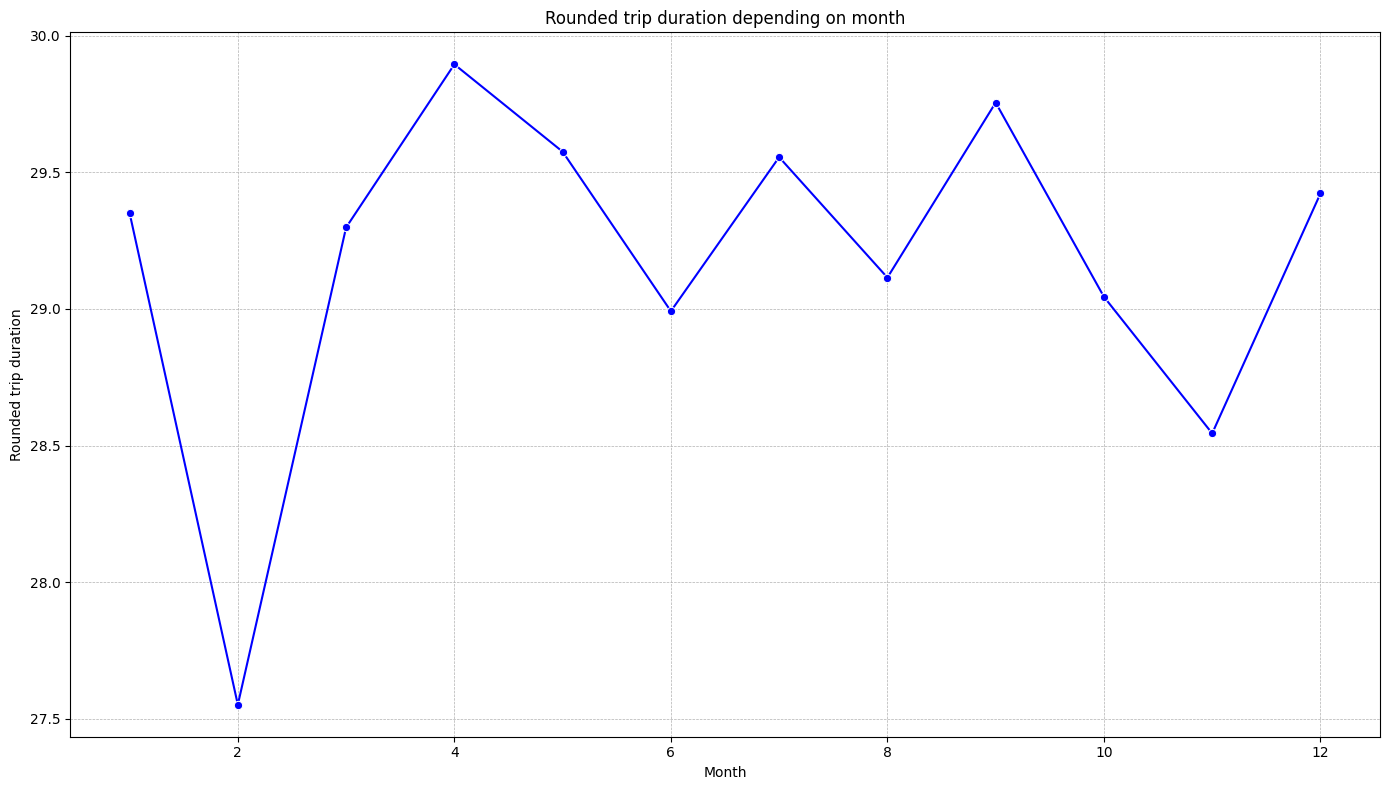

In [67]:
#visualization of rounded trip duration depending on the month of the trip
# Set up the chart style
plt.figure(figsize=(14, 8))

# Group data by month and calculate the average duration for each month
monthly_duration = aggregated_data.groupby('month_of_ride')['rounded_duration'].mean()

sns.lineplot(data=monthly_duration, marker='o', color='blue')

plt.title('Rounded trip duration depending on month')
plt.xlabel('Month')
plt.ylabel('Rounded trip duration')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

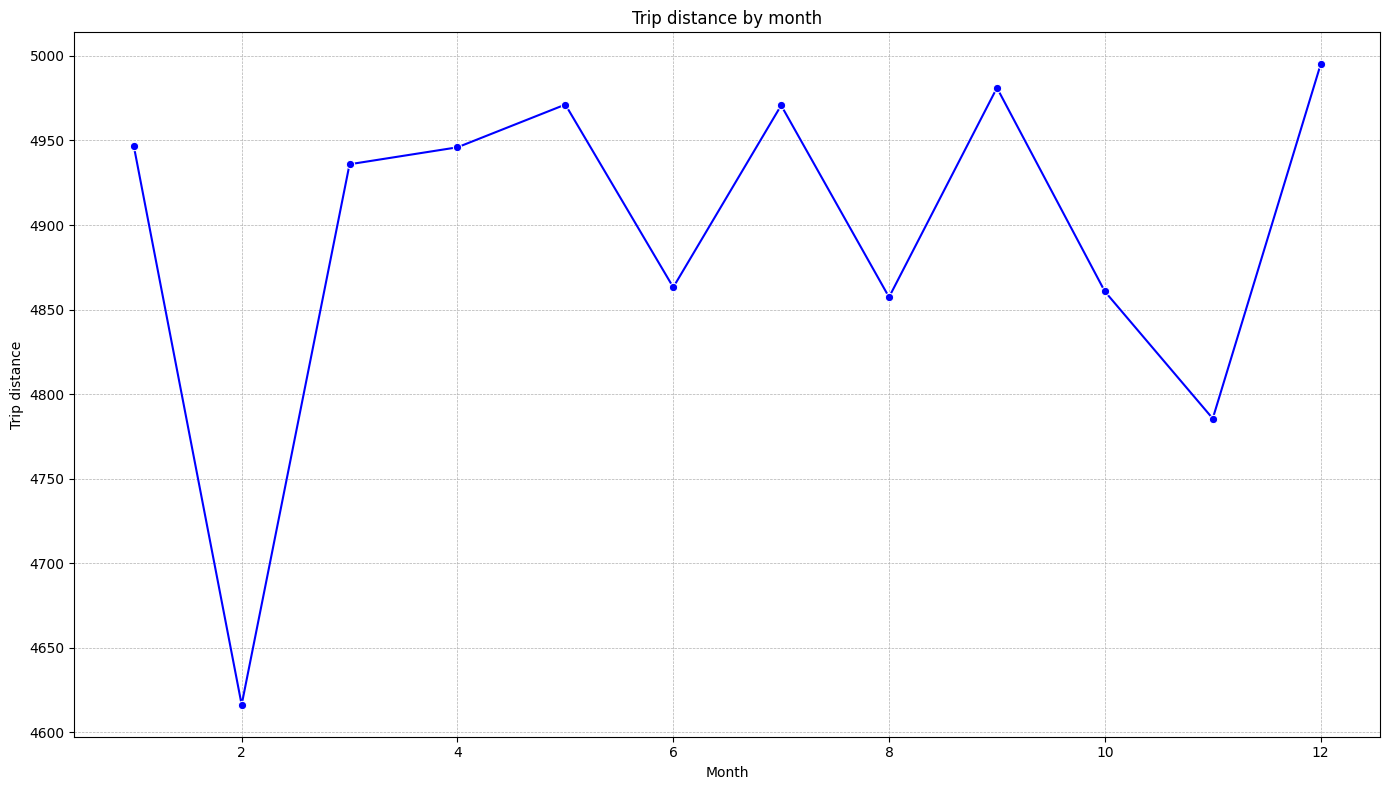

In [68]:
#visualization of the total distance depending on the month of the trip
# Set up the chart style
plt.figure(figsize=(14, 8))

# Group data by month and calculate the average distance for each month
monthly_distance = aggregated_data.groupby('month_of_ride')['total_distance'].mean()

sns.lineplot(data=monthly_distance, marker='o', color='blue')

plt.title('Trip distance by month')
plt.xlabel('Month')
plt.ylabel('Trip distance')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

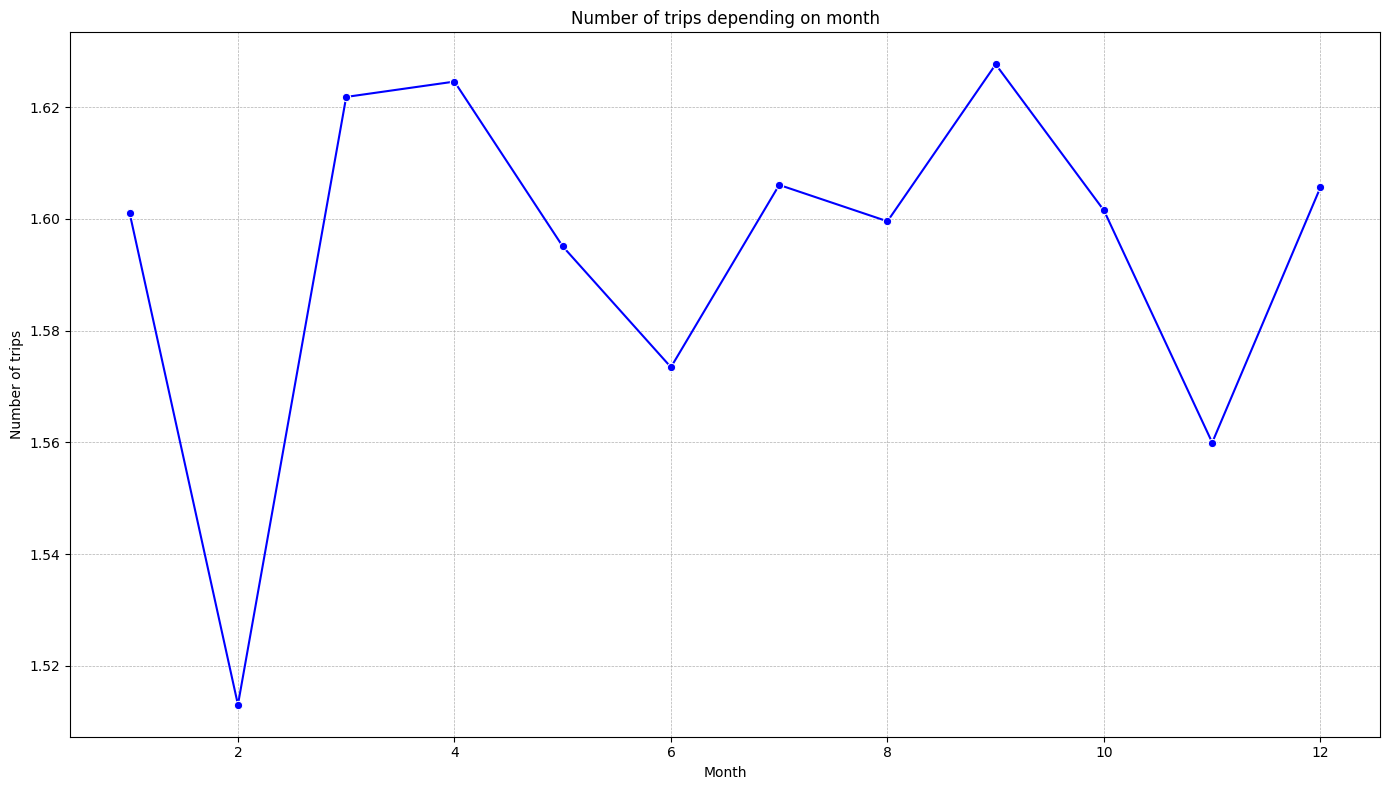

In [69]:
#visualization of the number of trips depending on the month
# Set up the chart style
plt.figure(figsize=(14, 8))

# Group data by month and calculate the average duration for each month
monthly_rides = aggregated_data.groupby('month_of_ride')['total_rides'].mean()

sns.lineplot(data=monthly_rides, marker='o', color='blue')

plt.title('Number of trips depending on month')
plt.xlabel('Month')
plt.ylabel('Number of trips')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [70]:
#Calculation of monthly revenue
#Monthly revenue is calculated using the formula: (cost of starting a trip ×number of trips) + cost of one minute of trip × total duration of all trips in minutes) + subscription cost.
aggregated_data['monthly_revenue'] = (aggregated_data['start_ride_price'] * aggregated_data['total_rides']) + (aggregated_data['minute_price'] * aggregated_data['rounded_duration']) + aggregated_data['subscription_fee']

In [71]:
aggregated_data.head()

,user_id,month_of_ride,subscription_type,total_distance,total_rides,rounded_duration,ride_cost,subscription_fee,start_ride_price,minute_price,monthly_revenue
0,1,1,ultra,7027.511294,2,42.0,252.0,199.0,0,6,451.0
1,1,4,ultra,754.159807,1,7.0,42.0,199.0,0,6,241.0
2,1,8,ultra,6723.470560,2,46.0,276.0,199.0,0,6,475.0
3,1,10,ultra,5809.911100,2,32.0,192.0,199.0,0,6,391.0
4,1,11,ultra,7003.499363,3,56.0,336.0,199.0,0,6,535.0


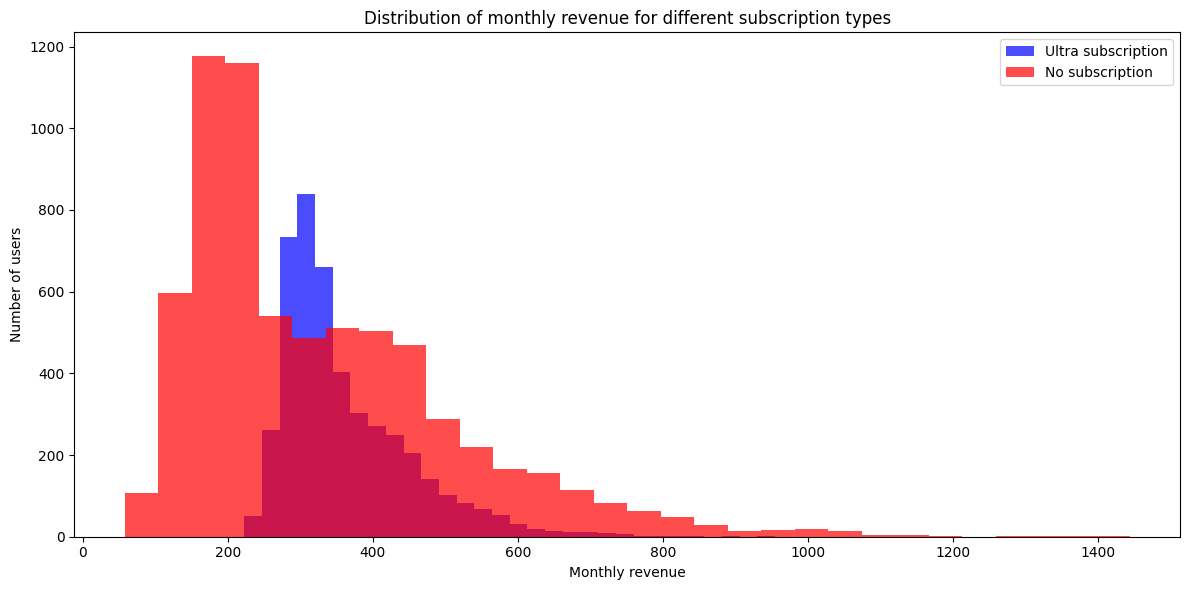

In [72]:
# Select data for users with 'ultra' subscription
ultra_data= aggregated_data[aggregated_data['subscription_type'] == 'ultra']['monthly_revenue']

# Select data for users without 'free' subscription
free_data= aggregated_data[aggregated_data['subscription_type'] == 'free']['monthly_revenue']

# Draw a histogram for users with the 'ultra' subscription
plt.figure(figsize=(12, 6))
plt.hist(ultra_data, bins=30, alpha=0.7, label='Ultra subscription', color='blue')

# Draw a histogram for users without a 'free' subscription
plt.hist(free_data, bins=30, alpha=0.7, label='No subscription', color='red')

plt.title('Distribution of monthly revenue for different subscription types')
plt.xlabel('Monthly revenue')
plt.ylabel('Number of users')
plt.legend()

plt.tight_layout()
plt.show()

##Conclusion Revenue calculation:
At this stage, key work was carried out to calculate the financial efficiency of the GoFast service. As a result of aggregation and calculations, the following main results were obtained:


**Aggregated data:**
Calculating the total distance, number of trips and total time for each user made it possible to identify customer activity by month. February was the least active month (one can assume that the weather conditions were not conducive to traveling on a scooter). Users made the longest trips in April, and the shortest in February. Users made the longest trips by distance in September and December. And the shortest distances were in February. Users made the largest number of trips in April and September, the smallest in February.


**Calculation of monthly revenue:**
Calculating the revenue that each user brings in made it possible to evaluate not only qualitative, but also quantitative indicators of the service. Taking into account different payment terms for users with and without a subscription made it possible to understand that the category of users with a subscription generates more income, but there are fewer users with a subscription.
Rounding the travel time to the next whole number ensures that revenue calculations are correct, taking into account the tariff conditions.
Overall, during the revenue calculation phase, important work was done to assess the financial contribution of each user to the company's overall revenue. This information can be used to further optimize marketing campaigns, as well as adjust pricing plans based on user needs and behavior.


# Step 6. Testing hypotheses

It is important to understand whether users with a subscription spend more time on travel. If so, then users with a subscription may be “more profitable” for the company. The hypothesis needs to be tested.

Hypothesis: H0 - The average travel time of users with a subscription is equal to the average travel time of users without a subscription


Hypothesis H1 -The average travel time of users with a subscription is greater than the average travel time of users without a subscription

In [73]:
merged_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_of_ride,minute_price,start_ride_price,subscription_fee,rounded_duration,ride_cost
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199,26.0,156.0
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199,16.0,96.0
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199,7.0,42.0
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199,19.0,114.0
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199,27.0,162.0


In [74]:
#Separation of data into users with and without subscription
users_with_ultra_subscription = merged_data[merged_data['subscription_type'] == 'ultra']
users_without_subscription = merged_data[merged_data['subscription_type'] == 'free']

In [75]:
# Conduct a t-test to compare means
t_stat, p_value = ttest_ind(users_with_ultra_subscription['rounded_duration'], users_without_subscription['rounded_duration'], equal_var=False,alternative='greater')
print(p_value)
# Analysis of results
if p_value < 0.05:
     print("The average travel time for users with and without a subscription is statistically significantly different. There is reason to reject hypothesis H0 in favor of H1")
else:
     print("The average travel time for users with and without a subscription does not differ statistically significantly. There is no reason to reject hypothesis H0")

1.1814679253701353e-36
The average travel time for users with and without a subscription is statistically significantly different. There is reason to reject hypothesis H0 in favor of H1


In [76]:
mean_duration_with__ultra_subscription = users_with_ultra_subscription['rounded_duration'].mean()
mean_duration_without_subscription = users_without_subscription['rounded_duration'].mean()

display("Average travel time for users with a subscription:", mean_duration_with__ultra_subscription)
display("Average travel time for users without a subscription:", mean_duration_without_subscription)

'Average travel time for users with a subscription:'

19.037692307692307

'Average travel time for users without a subscription:'

17.890992392807746

The distance of one trip is 3130 meters - optimal from the point of view of scooter wear. Is it possible to say that the distance traveled by users with a subscription in one trip does not exceed 3130 meters?
Let's formulate a hypothesis

H0: The average travel distance for users with a subscription does not exceed 3130 meters.
H1: The average travel distance for subscription users is greater than 3130 meters.

In [77]:
# Conduct a t-test to compare the average distance with a given value


# # Set distance value
distance_threshold = 3130
t_stat, p_value = ttest_1samp(users_with_ultra_subscription['distance'], distance_threshold, alternative='greater')
print(p_value)
print(users_with_ultra_subscription['distance'].mean())
# Analysis of results
if p_value < 0.05:
     print("The average travel distance for users with a subscription is statistically significantly higher than the specified value of 3130 meters. There are reasons to reject H0.")
else:
     print("There is no sufficient reason to reject hypothesis H0. The average travel distance for users with a subscription does not exceed 3130 meters.")


0.9195368847849785
3115.4453880370247
There is no sufficient reason to reject hypothesis H0. The average travel distance for users with a subscription does not exceed 3130 meters.


Test a hypothesis about whether the monthly revenue from users with a monthly subscription will be higher than the revenue from users without a subscription.

H0: Average monthly revenue from subscribers with a subscription is no different from revenue from users without a subscription.
H1: Average monthly revenue from users with a subscription is higher than revenue from users without a subscription.

In [78]:
# Conducting a t-test to compare the average monthly revenues of two samples
t_stat, p_value = ttest_ind(ultra_data, free_data, equal_var=False, alternative='greater')
print(p_value)
print(ultra_data.mean())
print(free_data.mean())
# Analysis of results
if p_value < 0.05:
     print("Average monthly revenue from users with a subscription is statistically significantly higher than revenue from users without a subscription. We can reject H0")
else:
     print("There is no statistically significant difference in average monthly revenue between subscribed and non-subscribed users.")

8.874140893976874e-40
362.7921906022502
328.6413651073845
Average monthly revenue from users with a subscription is statistically significantly higher than revenue from users without a subscription. We can reject H0


Task:
   Imagine this situation: the service’s technical team updated the servers with which the mobile application interacts. She hopes that because of this, the number of calls to technical support has decreased significantly. A certain file contains data for each user on the number of hits before and after the update. What test would you need to test this hypothesis?

To test the hypothesis that the number of calls to technical support decreased significantly after updating the servers, you can use a paired t-test for dependent samples.

The situation is described as follows:

We have data on the number of calls to technical support for each user before and after updating the servers.
Each pair of data for one user is related (the value before and after the update refers to the same user).
We are interested to know if there is a statistically significant difference in the average number of hits before and after the update.
Therefore, we can use a paired t-test to test the hypothesis that the average number of hits before and after the update is equal. If the p-value is less than the significance level (usually 0.05), then we can conclude that the number of calls to technical support has decreased significantly after updating the servers. Otherwise, there is no statistically significant difference in the number of calls.

##Conclusion: hypothesis testing


Users with a subscription spend more time commuting on average. This may indicate that they value the service more, or that the subscription terms allow them to use the service more often or for longer.

Users with a subscription, on average, travel a distance close to the optimal distance for scooter wear. This can be useful information for planning maintenance or determining the best route for users.

Monthly revenue from users with subscriptions is higher. This supports the idea that such users may be more "beneficial" to the company. This can also serve as a basis for actively promoting subscriptions among current and potential customers.

After a technical update, it is advisable to use a statistical test to determine the impact of the update on the number of calls to technical support. If the decrease is statistically significant, it may indicate an improved service experience for users.


# Step 7. Distributions

**Task **
The GoFast marketing department was given a task: they needed to run a promotion with the distribution of promotional codes for one free month of subscription, within the framework of which at least 100 existing customers must renew this subscription. That is, at the end of the subscription period, the user can either cancel it or renew it by making the appropriate payment. This promotion has already been carried out previously and as a result, it turned out that after the free trial period, 10% of users renew their subscriptions. Find out what minimum number of promotional codes needs to be sent out so that the probability of not fulfilling the plan is approximately 5%. Select the parameters of the distribution that describe this situation, build a distribution graph, and formulate an answer to the question about the number of promotional codes.

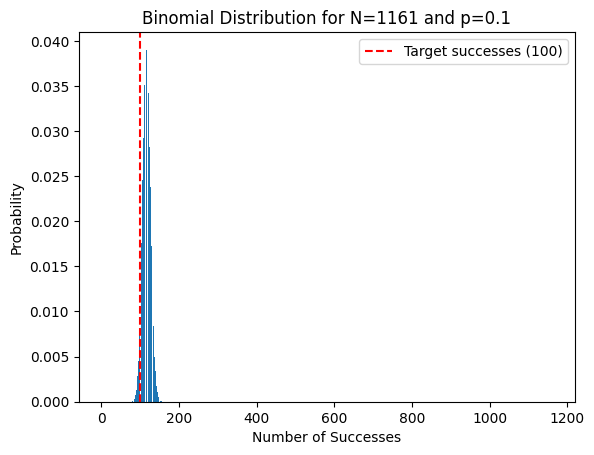

Minimum number of promotional codes to be sent: 1161


In [79]:
# options
p = 0.1
target_successes = 100
target_probability = 0.95

# range of possible values N
N_values = np.arange(1000, 2000)
probs = [1 - binom(N, p).cdf(target_successes - 1) for N in N_values]

# find the first value of N for which the probability exceeds 0.95
N_required = N_values[np.argmax(np.array(probs) > target_probability)]

# build a distribution graph
x = np.arange(0, N_required+1)
plt.bar(x, binom.pmf(x, N_required, p))
plt.axvline(x=target_successes, color='r', linestyle='dashed', label="Target successes (100)")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.title(f"Binomial Distribution for N={N_required} and p={p}")
plt.legend()
plt.show()

print(f"Minimum number of promotional codes to be sent: {N_required}")

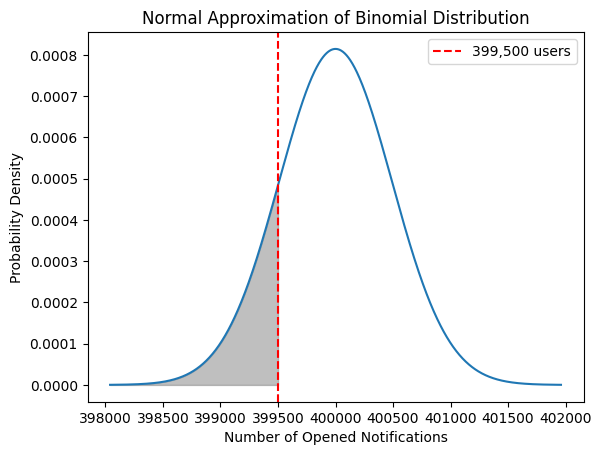

Probability that the notification will be opened by no more than 399,500 users: 0.1537


In [80]:
# Options
N = 1000000
p = 0.4
mu = N * p
sigma = np.sqrt(N * p * (1 - p))

# Probability calculation
probability = norm.cdf(399500, mu, sigma)

# Graphing
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
plt.plot(x, norm.pdf(x, mu, sigma))
plt.axvline(x=399500, color='r', linestyle='dashed', label="399,500 users")
plt.fill_between(x, norm.pdf(x, mu, sigma), where=(x <= 399500), color='gray', alpha=0.5)
plt.xlabel("Number of Opened Notifications")
plt.ylabel("Probability Density")
plt.title("Normal Approximation of Binomial Distribution")
plt.legend()
plt.show()

print(f"Probability that the notification will be opened by no more than 399,500 users: {probability:.4f}")

##Conclusions: Distributions

Promo Code Promotion: To reach the target of at least 100 users renewing their subscription, GoFast needs to send out 1,161 promo codes for one free month of subscription. This provides an acceptable level of risk (5%) that the stock may not perform as expected.
Push Notifications: If you plan to send 1 million notifications and expect an open rate of 40%, there is a 15.37% chance that the notification will be opened by no more than 399,500 users. This result can help the marketing department determine the expected return on a large-scale mailing and understand the potential risks.

#**GENERAL CONCLUSION**

Data were analyzed and hypotheses were tested that could help the business grow.
Users with a subscription spend more time commuting on average. This may indicate that they value the service more, or that the subscription terms allow them to use the service more often or for longer.
Users with a subscription, on average, travel a distance close to the optimal distance for scooter wear. This can be useful information for planning maintenance or determining the best route for users.
Monthly revenue from users with subscriptions is higher. This supports the idea that such users may be more "beneficial" to the company. This can also serve as a basis for actively promoting subscriptions among current and potential customers.

**Step 1: Download Data**
Data was successfully loaded from three CSV files: users_go.csv, rides_go.csv, and subscriptions_go.csv.
The primary analysis showed the structure and content of each of the data frames.

**Step 2: Data Preprocessing **
The date column was successfully cast to date format.
A new column with the month number has been added to analyze data by month.
There were no missing values, and duplicates were identified (62 rows) and removed.

**Step 3: Exploratory Data Analysis**
The main characteristics of users and trips were analyzed and visualized: distribution of users by city, ratio of users with and without subscription, age distribution, as well as distributions by distance and duration of trips.
Frequency of cities: The data contains users from several cities. Some cities are represented more actively, perhaps due to a more active advertising campaign. The leading cities in terms of user activity have been identified, which may indicate the most promising markets for the development or strengthening of marketing efforts. The most users are in Pyatigorsk (219), and the least in Moscow (168)
The ratio of users with subscriptions and without subscriptions: It was found that more people do not have a subscription (835) and with an ultra subscription only 699.
Age of users: The data revealed a range of user ages. They represent a wide range from teenagers 12 years old to middle age with a maximum of 43 years old, with the most common users of scooters being young people 25 years old.
Distance traveled by the user in one trip: Most trips are made over an average distance of just over 3 km (3133.60m), but you can also see a large number of short trips in the histogram. Probably scooters are often used for short trips (for example, from the metro to home)
Trip Duration: Users spend an average of 17.67 minutes traveling on scooters.
Step 4: Merging Data
Data about users, trips, and subscriptions has been successfully combined into one data frame.
Two separate data frames were created for users with and without subscriptions.
Information on distance and travel time for both categories of users is visualized.
Based on the graphs, we can conclude that the distance and duration of trips differ between users with and without a subscription. It may be that users with a subscription are more likely to use scooters for long trips or long distances due to preferential terms of use. The median travel time with a subscription is 18.17 minutes, and the median travel time without a subscription is 17.32. This means that users with a subscription spend on average about a minute more per trip than without a subscription. Users with a subscription are less likely to take short trips. Also, the median travel distance for users with a subscription is higher (3148 meters) than for users without a subscription (3114.64 meters).

**Step 5: Calculate revenue**
A data frame was created with aggregated trip data: total distance, number of trips, and total time for each user for each month.
Added a column with monthly revenue, taking into account payment terms and rounding of trip durations.
Calculating the total distance, number of trips and total time for each user made it possible to identify customer activity by month. February was the least active month (one can assume that the weather conditions were not conducive to traveling on a scooter). Users made the longest trips in April, and the shortest in February. Users made the longest trips by distance in September and December. And the shortest distances were in February. Users made the largest number of trips in April and September, and the smallest in February.
Calculation of monthly revenue:
Calculating the revenue that each user brings makes it possible to evaluate not only qualitative but also quantitative indicators of the service. Taking into account different payment terms for users with and without a subscription made it possible to understand that the category of users with a subscription generates more income, but there are fewer users with a subscription.

**Step 6 Hypothesis testing:**

1. Users with a subscription and their activity:
Users with a subscription spend more time commuting on average compared to users without a subscription. This fact highlights the importance of subscribers to a business: they are likely to find the service more valuable and integrate it into their daily lives. It could also indicate that their subscription terms provide them with more flexibility or encourage them to use the service more often.
2 Optimal distance and maintenance:
It is noted that users with a subscription, on average, travel a distance that is optimal from the point of view of wear and tear on the scooter. This provides valuable data for the maintenance department. Understanding how often scooters need maintenance will allow the company to allocate resources more efficiently and minimize scooter downtime.
3 Cost-effectiveness of subscribers:
Subscribers bring more revenue to the company every month. This is critical information for the marketing department. By promoting a subscription model, a company can increase its revenue by encouraging users to upgrade to subscription plans. It may also prompt the company to provide additional incentives or bonuses to subscribers to attract and retain them.
4 Technical updates and support requests:
After implementing a technical update, it would be strategic to conduct a statistical test on the impact of the update on the number of support calls. A decrease in calls, if statistically significant, is an indicator of the success of the update. It can also serve as an indicator of user satisfaction and service quality.

**Step 7 Distributions**
The distribution of promotions with promotional codes was analyzed, and the minimum number of promotional codes (1161) was determined to achieve the target number of subscription renewals.
The probability of successful opening of push notifications was estimated to be 15.37%.


Conclusion: **bold text** The study found that subscribed users have particular business value, both in terms of activity and economic contribution. To maximize profits and user satisfaction, a company should pay special attention to subscription terms and benefits, as well as the maintenance and optimization of its product.




#**Final output**:
  By analyzing the data and testing hypotheses, the following key conclusions can be drawn:

Users with a subscription spend more time traveling. This may indicate that the service is of great value to them, or that the terms of the subscription allow them to use the service more often or longer.
Users with a subscription, on average, travel a distance close to the optimal distance for scooter wear. This is important information for planning maintenance and determining the best route.
Monthly revenue from users with a subscription is higher, which makes them potentially more “profitable” for the company.
Based on these findings, I recommend:

1. Actively promote subscriptions among current and potential users, since they generate more revenue and demonstrate greater loyalty to the service.
2. Consider optimizing routes or providing route recommendations for users based on average travel distance to minimize wear and tear on scooters and optimize the maintenance process.
3. Pay attention to improving subscription conditions or introducing new types of subscriptions to attract more users to regularly use the service.